In [1]:
# created by zayaan. going to test using a basic neural network for the stuff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#we want to create a neural network, so we need to import the keras library
from keras.models import Sequential
import tensorflow as tf
from sklearn.ensemble import IsolationForest

In [27]:
csv_file = "500k.csv" 
df = pd.read_csv(csv_file, sep=",")
# individual photometry filters
u = df['u']
g = df['g']
r = df['r']
i = df['i']
z = df['z']

# color indices
u_g = u - g
g_r = g - r
r_i = r - i
i_z = i - z

# u_g = u_g[:-19500]
# g_r = g_r[:-19500]
# r_i = r_i[:-19500]
# i_z = i_z[:-19500]

# Effective temperature of star
temperature = df['Teff']

metallicity = df['FeH']

color_filters_df = pd.DataFrame()
color_filters_df['u_g'] = u_g
color_filters_df['g_r'] = g_r
color_filters_df['r_i'] = r_i
color_filters_df['i_z'] = i_z

# Effective temperature of star
color_filters_df['temperature'] = df['Teff']
color_filters_df['metallicity'] = df['FeH']
print(df.shape)

(500000, 7)


In [28]:
#iterate thru temperature,
#if its 4353, print out the corresponding color filters
# for i in range(len(temperature)):
#     if color_filters_df.iloc[i]['u_g'] > 10:
#         #print temperature
#         print("Temp: ", color_filters_df.iloc[i][''])
#         print("u_g: ", color_filters_df.iloc[i]['u_g'])


In [29]:
# Model Training for Isolation Trees 
isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
isoforest.fit(color_filters_df[["temperature"]])

IsolationForest(contamination=0.1, n_estimators=150)

In [30]:
# Prediction
color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["temperature"]])
color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["temperature"]])
color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]

#now do it u_g, g_r, r_i, i_z, metallicity
isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
isoforest.fit(color_filters_df[["u_g"]])
# Prediction
color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["u_g"]])
color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["u_g"]])
color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]


# isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["g_r"]])
# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["g_r"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["g_r"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]


# # #now do for rest of inputs
# isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["r_i"]])
# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["r_i"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["r_i"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]
# # #now do for rest of inputs
# # isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["i_z"]])
# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["i_z"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["i_z"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]
# #now do for rest of inputs
# # isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["metallicity"]])
# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["metallicity"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["metallicity"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]



#now do it 

# color_filters_df.head(100)
# list(color_filters_df['anomaly']).count(-1)
# print(color_filters_df.shape)
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]
# print(color_filters_df.shape)

In [31]:
print(color_filters_df.shape)

(266904, 8)


In [6]:
#the input of the model is the color indices, and the output is the temperature.
#lets perform this with a neural network
#we need to split the data into training and testing data
#we will use 80% of the data for training and 20% for testing
#we will also shuffle the data to avoid any bias

X = color_filters_df[['u_g', 'g_r', 'r_i', 'i_z', 'metallicity']].values
# X = color_filters_df[['g_r', 'r_i']].values
y = color_filters_df['temperature'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [42]:
!pip install pycaret pandas shap

In [1]:
from pycaret.regression import *


In [3]:
#print pycaret version
s = setup(color_filters_df, target = 'temperature')#, session_id=123, log_experiment=True, experiment_name='star_temp')

NameError: name 'color_filters_df' is not defined

In [7]:
#plot the each X vs y
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 4, 1)
# plt.scatter(X_train[:, 0], y_train, s=1, label='train')
# plt.scatter(X_test[:, 0], y_test, s=1, label='test')
# plt.xlabel('u_g')
# plt.ylabel('temperature')
# plt.legend()
print(y.shape)

(408167,)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)), #change input shape based on how many u using
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  #1 neuron output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [9]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
8164/8164 [==============================] - 11s 1ms/step - loss: 241604960.0000 - mae: 849.8403 - val_loss: 11081843.0000 - val_mae: 488.9012
Epoch 2/20
8164/8164 [==============================] - 11s 1ms/step - loss: 37845360.0000 - mae: 594.4327 - val_loss: 5232641.5000 - val_mae: 2111.0188
Epoch 3/20
8164/8164 [==============================] - 10s 1ms/step - loss: 3282172.0000 - mae: 745.3661 - val_loss: 22382222.0000 - val_mae: 4665.9268
Epoch 4/20
8164/8164 [==============================] - 10s 1ms/step - loss: 4535450.5000 - mae: 724.0488 - val_loss: 277351.8750 - val_mae: 380.5016
Epoch 5/20
8164/8164 [==============================] - 11s 1ms/step - loss: 1705443.6250 - mae: 472.7396 - val_loss: 746779.3750 - val_mae: 316.8929
Epoch 6/20
8164/8164 [==============================] - 11s 1ms/step - loss: 2131497.2500 - mae: 367.5248 - val_loss: 1493006.2500 - val_mae: 340.8845
Epoch 7/20
8164/8164 [==============================] - 10s 1ms/step - loss: 2553193.0000

In [10]:
#print accuracy of model
print(model.evaluate(X_test, y_test))

2552/2552 [==============================] - 2s 832us/step - loss: 477405.6250 - mae: 264.8571
[477405.625, 264.85711669921875]


In [11]:
predictions = model.predict(X_test)

#assign max to a really low number
max = -10000000
#assign min to a really high number
min = 10000000

avg = 0

for i in range(len(X_test)):
    # print("Input:", X_test[i])
    #if actual output is greater than 250000, then pritn it
    if y_test[i] == 4353 and predictions[i][0] > 250000:
        print("Input:", X_train[i])
        print("Expected Output:", y_test[i])
        print("Actual Output:", predictions[i][0])  # predictions[i] is a 2D array, so we access the value with [0]
        print()
    #update max and min accordingly, based on difference in expected and actual output
    if abs(y_test[i] - predictions[i][0]) > max:
        max = abs(y_test[i] - predictions[i][0])
    if abs(y_test[i] - predictions[i][0]) < min:
        min = abs(y_test[i] - predictions[i][0])
    avg += abs(y_test[i] - predictions[i][0])
avg = avg / len(X_test)
# print(min, max, avg)

2552/2552 [==============================] - 2s 772us/step


In [12]:
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.410421062855565


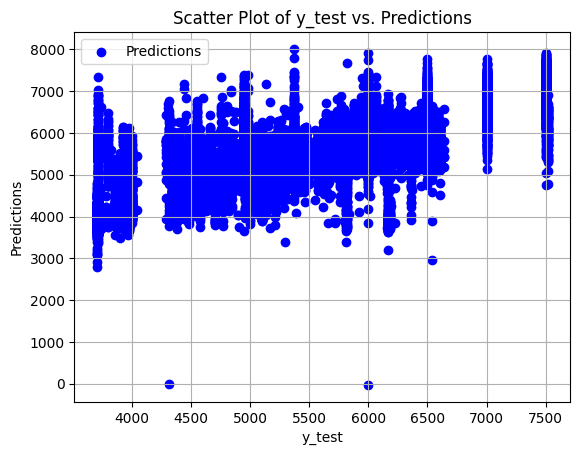

In [183]:
plt.scatter(y_test, predictions, c='b', marker='o', label='Predictions')

# Add labels and a 1:1 line for reference
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.plot(color='red', linestyle='--', label='1:1 Line')

# Add a legend
plt.legend()

# Show the plot
plt.title("Scatter Plot of y_test vs. Predictions")
plt.grid(True)
plt.show()

In [188]:
#for predicted y values of less than 100, find the associated input values
for i in range(len(predictions)):
    if predictions[i] < 100:
        print("Input:", X_test[i])
        print("Expected Output:", y_test[i])
        print("Actual Output:", predictions[i])  # predictions[i] is a 2D array, so we access the value with [0]
        print()


Input: [ 2.46732000e+00  1.14901000e+00  1.00140941e+04 -1.00132649e+04
 -2.50000000e-01]
Expected Output: 4318
Actual Output: [-1.241194]

Input: [ 1.36397000e+00  3.57730000e-01  1.00132056e+04 -1.00133055e+04
 -1.00000000e+00]
Expected Output: 6000
Actual Output: [-30.391584]

